# Exploration and Preprocessing of Mercari Price Suggestion Challenge

This kernel includes data exploration and preprocessing of Kaggle's competition [Mercari Price Suggestion Challenge](https://www.kaggle.com/c/mercari-price-suggestion-challenge)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Loading the data

In [5]:
train = pd.read_csv('./train.tsv', sep='\t')
test = pd.read_csv('./test.tsv', sep='\t')

## How does the train and test set look like?

In [6]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [7]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [8]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [9]:
test.dtypes

test_id               int64
name                 object
item_condition_id     int64
category_name        object
brand_name           object
shipping              int64
item_description     object
dtype: object

In [10]:
# checking for Nulls
obj = train.select_dtypes(include=['object']).copy()
train[obj.isnull().any(axis=1)]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...
17,17,New: Baby K'tan active baby carrier,1,Kids/Gear/Backpacks & Carriers,NaN,29.0,1,Brand new in box Size: Medium Color: Coral Ret...
23,23,Triple car charger,1,Electronics/Cell Phones & Accessories/Chargers...,NaN,8.0,1,Brand new never used All colors are available ...
31,31,"New Lularoe OS leggings, stars",1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,50.0,1,No description yet
34,34,Four puppy dog stuffed animal ty,3,Kids/Toys/Stuffed Animals & Plush,NaN,5.0,1,2 beanie babies pugsley wrinkles Puppy with pu...
35,35,Black Capri Leggings w/ Flowers One size,1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,13.0,1,One size fits sizes 2-12 92% polyester 8% span...


## How many rows and columns each set has?

In [11]:
train.shape

(1482535, 8)

In [12]:
test.shape

(693359, 7)

## What are the different Brands and Categories?

### Train Set

In [13]:
train['brand_name'].unique()

array([nan, 'Razer', 'Target', ..., 'Astroglide', 'Cumberland Bay',
       'Kids Only'], dtype=object)

In [14]:
train['category_name'].unique()

array(['Men/Tops/T-shirts',
       'Electronics/Computers & Tablets/Components & Parts',
       'Women/Tops & Blouses/Blouse', ..., 'Handmade/Jewelry/Clothing',
       'Vintage & Collectibles/Supplies/Ephemera', 'Handmade/Pets/Blanket'], dtype=object)

### Test Set

In [15]:
test['brand_name'].unique()

array([nan, 'Coach', 'Vintage', ..., 'Astroglide', 'Hi-Tec', 'PediaCare'], dtype=object)

In [16]:
test['category_name'].unique()

array(['Women/Jewelry/Rings', 'Other/Office supplies/Shipping Supplies',
       'Vintage & Collectibles/Bags and Purses/Handbag', ...,
       'Vintage & Collectibles/Accessories/Shawl', 'Handmade/Toys/Baby',
       'Vintage & Collectibles/Serving/Tray'], dtype=object)

## Let's explore the distribution of price

### For the different Brands

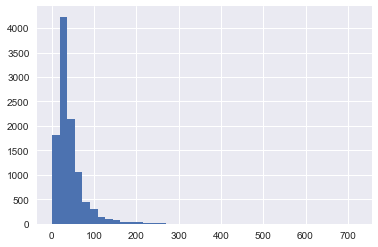

In [17]:
train[train['brand_name'] == 'Coach'].price.hist(bins=40);

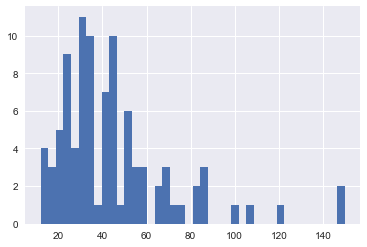

In [18]:
train[train['brand_name'] == 'Razer'].price.hist(bins=40);

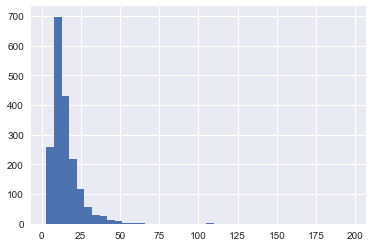

In [19]:
train[train['brand_name'] == 'Target'].price.hist(bins=40);

### For the different Categories

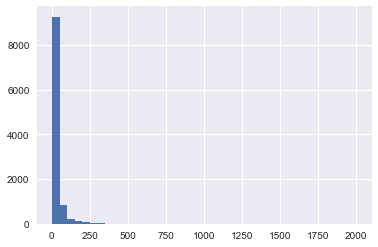

In [20]:
train[train['category_name'] == 'Women/Jewelry/Rings'].price.hist(bins=40);

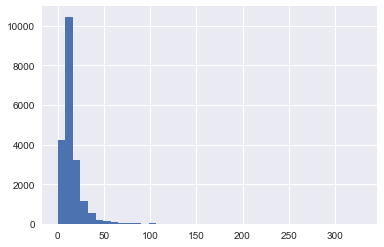

In [21]:
train[train['category_name'] == 'Women/Tops & Blouses/Blouse'].price.hist(bins=40);

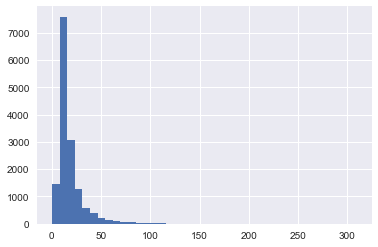

In [22]:
train[train['category_name'] == 'Men/Tops/T-shirts'].price.hist(bins=40);

## Data Preprocessing

### Dummy Variables Approach

The category_name is a categorical variable, so we have to turn it into dummy variables and check the correlation between them and the price.

In [23]:
df_dummies = pd.get_dummies(train['category_name'])
df_dummies.head()

,Beauty/Bath & Body/Bath,Beauty/Bath & Body/Bathing Accessories,Beauty/Bath & Body/Cleansers,Beauty/Bath & Body/Other,Beauty/Bath & Body/Scrubs & Body Treatments,Beauty/Bath & Body/Sets,Beauty/Fragrance/Candles & Home Scents,Beauty/Fragrance/Kids,Beauty/Fragrance/Men,Beauty/Fragrance/Other,...,Women/Women's Accessories/Watches,Women/Women's Handbags/Backpack Style,Women/Women's Handbags/Baguette,Women/Women's Handbags/Cosmetic Bags,Women/Women's Handbags/Hobo,Women/Women's Handbags/Messenger & Crossbody,Women/Women's Handbags/Other,Women/Women's Handbags/Satchel,Women/Women's Handbags/Shoulder Bag,Women/Women's Handbags/Totes & Shoppers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_new = pd.concat([train['price'], df_dummies], axis=1)
df_new.head()

,price,Beauty/Bath & Body/Bath,Beauty/Bath & Body/Bathing Accessories,Beauty/Bath & Body/Cleansers,Beauty/Bath & Body/Other,Beauty/Bath & Body/Scrubs & Body Treatments,Beauty/Bath & Body/Sets,Beauty/Fragrance/Candles & Home Scents,Beauty/Fragrance/Kids,Beauty/Fragrance/Men,...,Women/Women's Accessories/Watches,Women/Women's Handbags/Backpack Style,Women/Women's Handbags/Baguette,Women/Women's Handbags/Cosmetic Bags,Women/Women's Handbags/Hobo,Women/Women's Handbags/Messenger & Crossbody,Women/Women's Handbags/Other,Women/Women's Handbags/Satchel,Women/Women's Handbags/Shoulder Bag,Women/Women's Handbags/Totes & Shoppers
0,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This doesn't seem very helpful, cause the table is very big, so we are going to use the label encoding approach 

### Label Encoding

Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1 onto one column.

In [25]:
train["category_name"].value_counts().head()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
Name: category_name, dtype: int64

In [26]:
train["brand_name"].value_counts().head()

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
Name: brand_name, dtype: int64

In [27]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
train["brand_name"] = encoder.fit_transform(train["brand_name"].fillna('Nan'))
train["category_name"] = encoder.fit_transform(train["category_name"].fillna('Nan'))
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,808,3002,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,86,3558,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,1255,4181,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,485,3002,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,1182,3002,44.0,0,Complete with certificate of authenticity
